# Sudoku - Python version

In [2]:
import numpy as np
import pandas as pd
import time

# special thanks to the computerphile youtube channel for this algorithm
# https://github.com/winson-cell/sudoku_solver_python/blob/master/Main.py
# accompanying video https://www.youtube.com/watch?v=G_UYXzGuqvM

## Puzzles

In [3]:
computerphile_base = [
        [5, 3, 0, 0, 7, 0, 0, 0, 0],
        [6, 0, 0, 1, 9, 5, 0, 0, 0],
        [0, 9, 8, 0, 0, 0, 0, 6, 0],
        [8, 0, 0, 0, 6, 0, 0, 0, 3],
        [4, 0, 0, 8, 0, 3, 0, 0, 1],
        [7, 0, 0, 0, 2, 0, 0, 0, 6],
        [0, 6, 0, 0, 0, 0, 2, 8, 0],
        [0, 0, 0, 4, 1, 9, 0, 0, 5],
        [0, 0, 0, 0, 8, 0, 0, 0, 0]] 
# PYTHON: 2 solutions, --- 0.13976192474365234 seconds ---
# JULIA: 2 solutions,  --- 0.035505 seconds ---


medium_1 = [
        [0, 0, 0, 0, 7, 0, 4, 0, 0],
        [6, 7, 3, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 3, 9, 0, 5, 0, 0],
        [3, 0, 2, 0, 0, 0, 0, 0, 8],
        [0, 0, 7, 0, 1, 0, 0, 0, 9],
        [0, 0, 0, 5, 0, 2, 0, 0, 0],
        [0, 0, 0, 2, 5, 8, 0, 3, 0],
        [0, 0, 0, 0, 0, 7, 0, 4, 0],
        [5, 6, 0, 0, 0, 0, 0, 0, 0]] 
# PYTHON: 11 solutions, --- 0.25779104232788086 seconds ---
# JULIA: 11 solutions,  --- 0.056143 seconds ---


hard_1 = [
        [3, 7, 0, 0, 0, 9, 0, 0, 6],
        [8, 0, 0, 1, 0, 3, 0, 7, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 8],
        [0, 2, 0, 0, 8, 0, 0, 0, 5],
        [1, 8, 7, 0, 0, 0, 6, 4, 2],
        [5, 0, 0, 0, 2, 0, 0, 1, 0],
        [7, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 5, 0, 6, 0, 2, 0, 0, 7],
        [2, 0, 0, 3, 0, 0, 0, 6, 1]] 
# PYTHON: 1 solution, --- 0.2648599147796631 seconds ---
# JULIA: 1 solution,  --- 0.058430 seconds ---


hard_2 = [
        [0, 0, 3, 0, 0, 0, 0, 0, 0],
        [8, 0, 9, 4, 6, 0, 7, 0, 2],
        [2, 0, 0, 0, 1, 8, 6, 0, 0],
        [0, 0, 0, 0, 0, 6, 0, 7, 0],
        [0, 0, 8, 0, 0, 0, 4, 0, 0],
        [0, 7, 0, 8, 0, 0, 0, 0, 0],
        [0, 0, 2, 9, 4, 0, 0, 0, 5],
        [4, 0, 6, 0, 3, 2, 8, 0, 7],
        [0, 0, 0, 0, 0, 0, 2, 0, 0]] 
# PYTHON: 1 solution, --- 0.9040899276733398 seconds ---
# JULIA: 1 solution,  --- 0.116727 seconds ---

ultra_hard_1 = [
        [0, 0, 5, 3, 0, 0, 0, 0, 0],
        [8, 0, 0, 0, 0, 0, 0, 2, 0],
        [0, 7, 0, 0, 1, 0, 5, 0, 0],
        [4, 0, 0, 0, 0, 5, 3, 0, 0],
        [0, 1, 0, 0, 7, 0, 0, 0, 6],
        [0, 0, 3, 2, 0, 0, 0, 8, 0],
        [0, 6, 0, 5, 0, 0, 0, 0, 9],
        [0, 0, 4, 0, 0, 0, 0, 3, 0],
        [0, 0, 0, 0, 0, 9, 7, 0, 0]] 
# this one is apparently the hardest for humans to do, written by finnish mathematician Arto Inkala
# PYTHON: 1 solution, --- 1.2927770614624023 seconds ---
# JULIA: 1 solution,  --- 0.178240 seconds seconds ---



## Algorithm

In [4]:
def possible(grid, x, y, n):
    for i in range (0, 9):
        if grid[i][y] == n:
            return False
        
    for j in range (0, 9):
        if grid[x][j] == n:
            return False

    x0 = (x // 3) * 3
    y0 = (y // 3) * 3

    for i in range(0, 3):
        for j in range(0, 3):
            if grid[x0 + i][y0 + j] == n: ## here is the bug in the github code
                return False
    return True


In [5]:
def solve(grid):
    for i in range (0, 9):
        for j in range (0, 9):
            if grid[i][j] == 0:
                for x in range(1,10):
                    if possible(grid, i, j, x):
                        grid[i][j] = x
                        solve(grid)
                        grid[i][j] = 0
                return
    print(np.matrix(grid), "\n")

In [6]:
start_time = time.time()
solve(ultra_hard_1)
print("--- %s seconds ---" % (time.time() - start_time))


[[1 4 5 3 2 7 6 9 8]
 [8 3 9 6 5 4 1 2 7]
 [6 7 2 9 1 8 5 4 3]
 [4 9 6 1 8 5 3 7 2]
 [2 1 8 4 7 3 9 5 6]
 [7 5 3 2 9 6 4 8 1]
 [3 6 7 5 4 2 8 1 9]
 [9 8 4 7 6 1 2 3 5]
 [5 2 1 8 3 9 7 6 4]] 

--- 1.3792057037353516 seconds ---


## Time analysis

In [7]:
t = {'time': [0.13976192474365234, 0.25779104232788086, 0.2648599147796631, 0.9040899276733398, 1.2927770614624023, 0.035505, 0.056143, 0.058430, 0.116727, 0.178240], 
     'program': ['Python', 'Python', 'Python', 'Python',  'Python', 'Julia',  'Julia', 'Julia', 'Julia','Julia'],
     'puzzle': ['base', 'medium_1','hard_1','hard_2','ultra_hard','base', 'medium_1','hard_1','hard_2','ultra_hard']}
data = pd.DataFrame(data=t)
data

,time,program,puzzle
0,0.139762,Python,base
1,0.257791,Python,medium_1
2,0.264860,Python,hard_1
3,0.904090,Python,hard_2
4,1.292777,Python,ultra_hard
5,0.035505,Julia,base
6,0.056143,Julia,medium_1
7,0.058430,Julia,hard_1
8,0.116727,Julia,hard_2
9,0.178240,Julia,ultra_hard


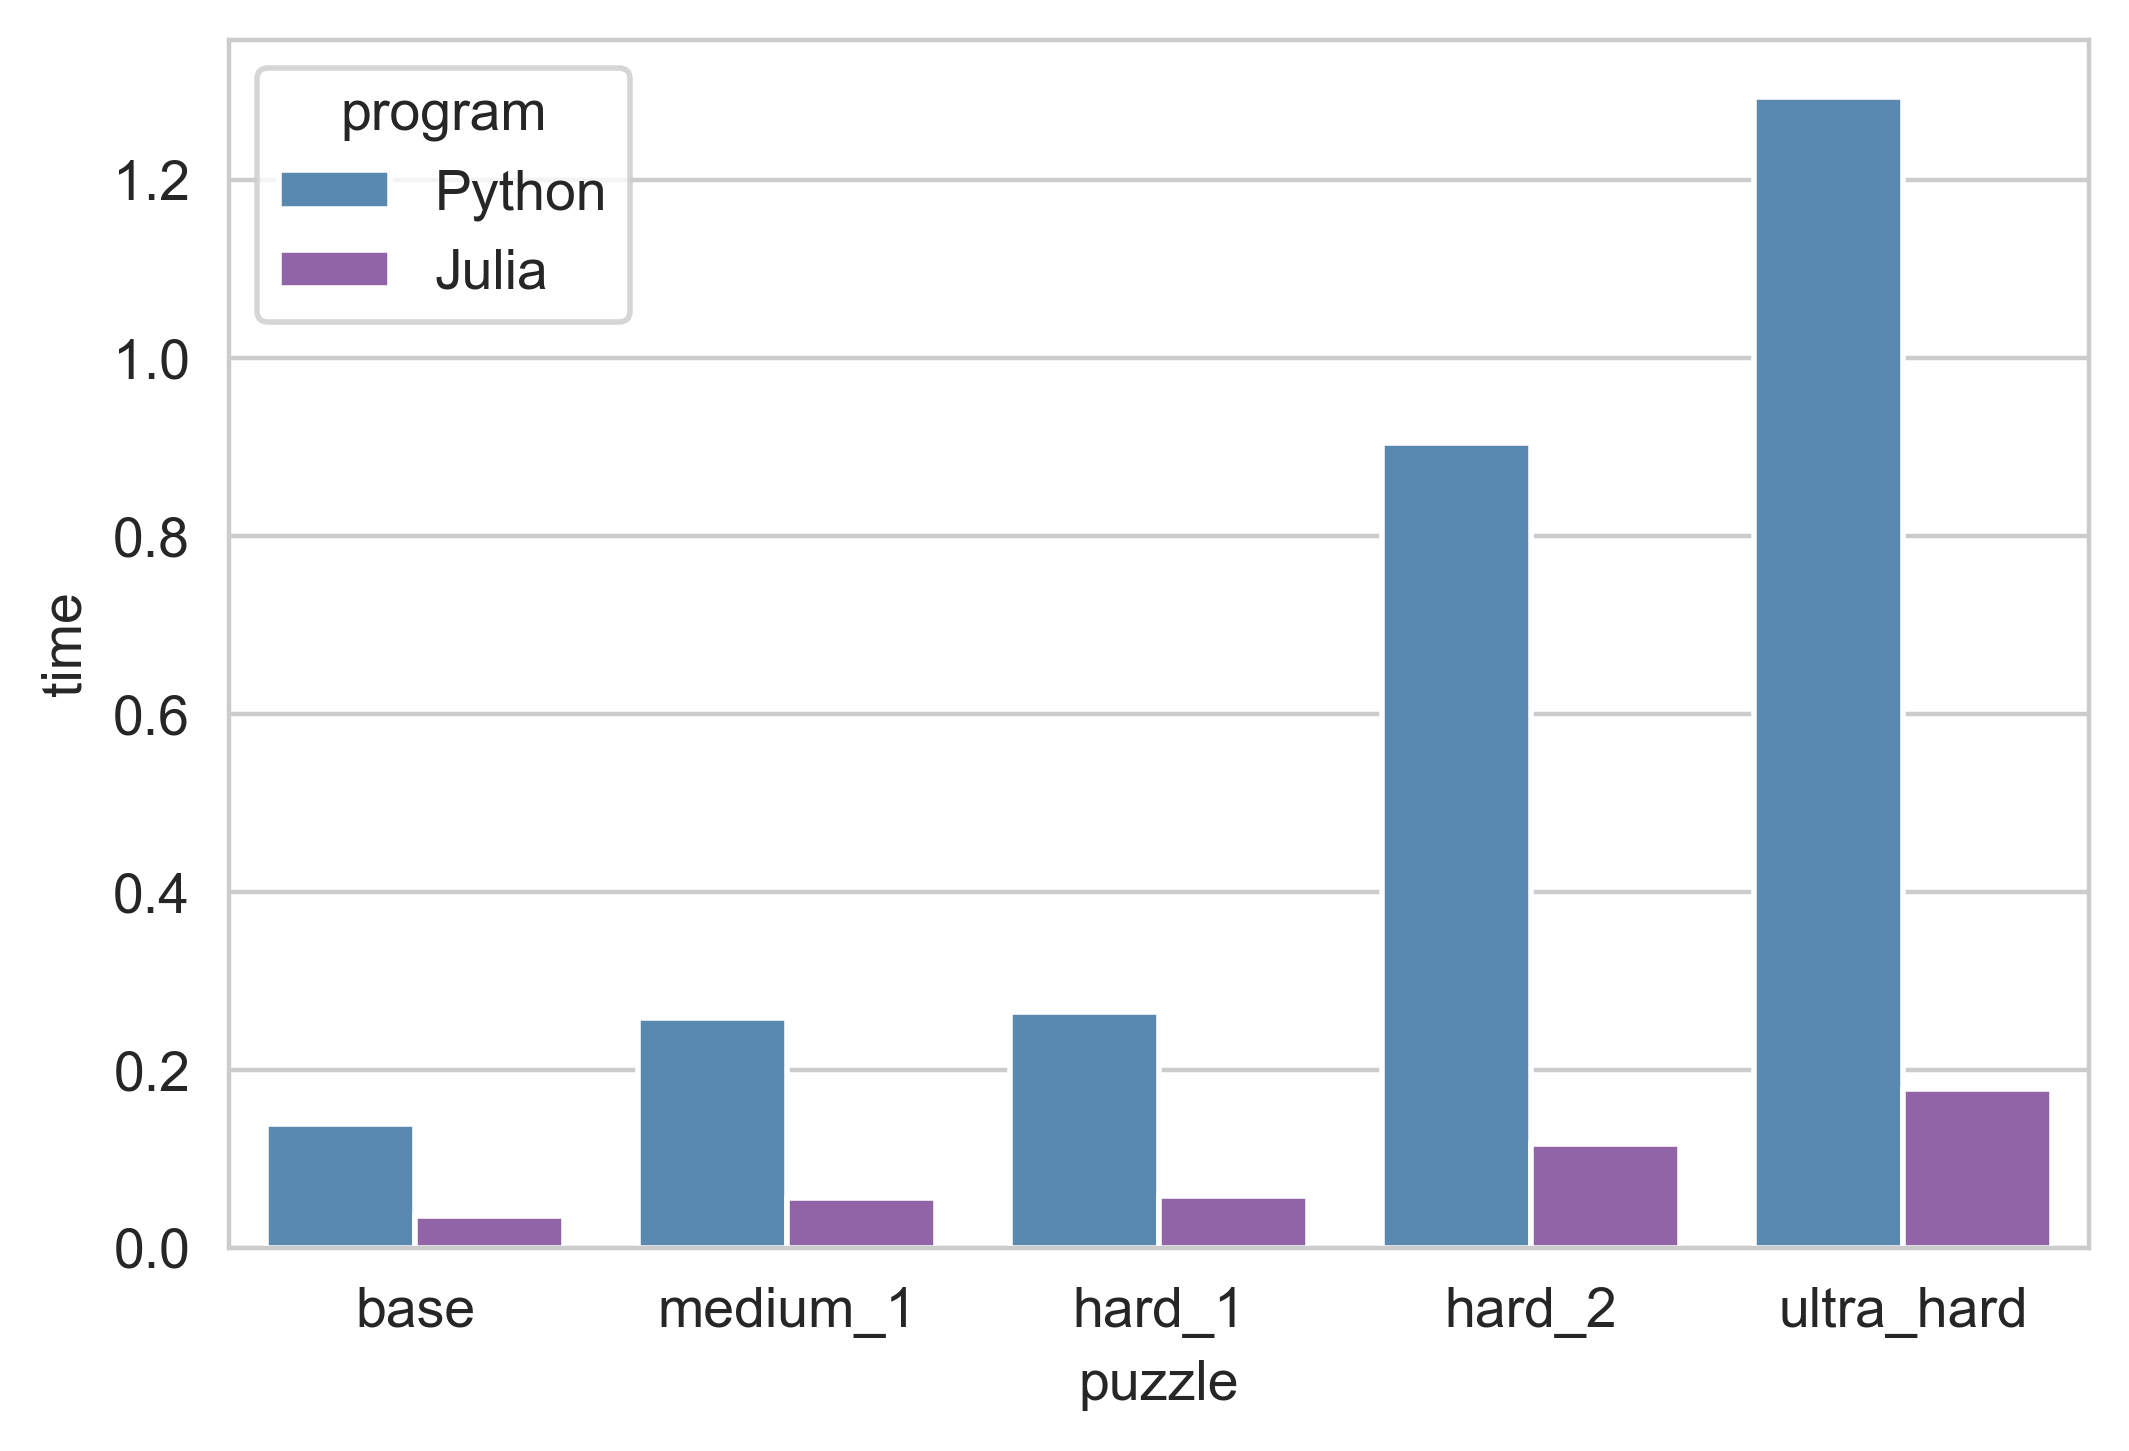

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(["#4b8bbe","#9558b2"]))
# "#4b8bbe" is one of pythons official colors, julias official purple is "#9558b2"

fig=plt.figure(figsize=(6,4), dpi= 400, facecolor='w', edgecolor='k')
ax = sns.barplot(x="puzzle", y="time", hue="program", data=data)
plt.savefig('pyjl_speeds.png')